Comenzamos con la importación de las librerías necesarias:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline
sns.set_theme()

# Conjunto de datos

## Carga de datos desde archivo
Los datos se presentan como un único archivo csv separado por comas. Nos quedamos únicamente los datos de reposo tras carga.

In [ ]:
df = pd.read_excel('dataset.xlsx')
df = df[df["State"] == 2]
df.head()

,I,V,State,T1,T2,SOC
0,0.0,3.589837,2,40.11519,38.83156,100.0
1,0.0,3.503166,2,40.13894,38.83156,100.0
2,0.0,3.476616,2,40.11519,38.81969,100.0
3,0.0,3.459525,2,40.13894,38.87901,100.0
4,0.0,3.447318,2,40.15081,38.90273,100.0


## Información general del conjunto de datos
El subconjunto de reposo tras carga contiene un total de 1089 observaciones.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1089 entries, 0 to 15299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       1089 non-null   float64
 1   V       1089 non-null   float64
 2   State   1089 non-null   int64  
 3   T1      1089 non-null   float64
 4   T2      1089 non-null   float64
 5   SOC     1089 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 59.6 KB


## Medidas de tendencia central y variabilidad

In [ ]:
df.describe()

,I,V,State,T1,T2,SOC
count,1089.0,1089.000000,1089.0,1089.000000,1089.000000,1089.0
mean,0.0,3.362476,2.0,40.701320,39.346630,100.0
std,0.0,0.035376,0.0,0.437838,0.423838,0.0
min,0.0,3.341115,2.0,39.272160,38.036780,100.0
25%,0.0,3.343862,2.0,40.400160,39.033220,100.0
50%,0.0,3.349050,2.0,40.780120,39.436540,100.0
75%,0.0,3.363699,2.0,41.088830,39.733100,100.0
max,0.0,3.591974,2.0,41.255070,39.946620,100.0


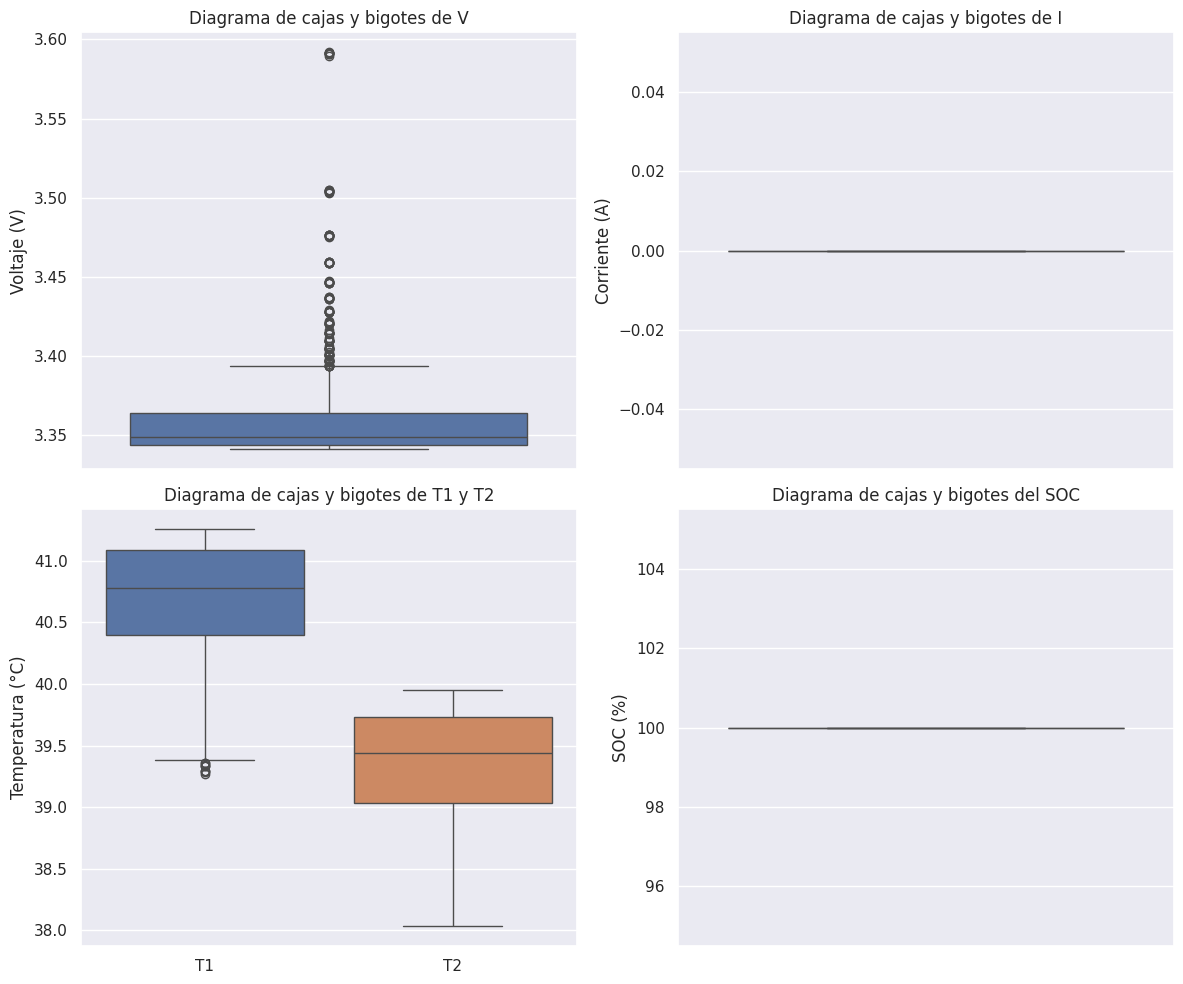

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(ax=axes[0, 0], y=df['V'])
axes[0, 0].set_ylabel("Voltaje (V)")
axes[0, 0].set_title('Diagrama de cajas y bigotes de V')

sns.boxplot(ax=axes[0, 1], y=df['I'])
axes[0, 1].set_ylabel("Corriente (A)")
axes[0, 1].set_title('Diagrama de cajas y bigotes de I')

sns.boxplot(ax=axes[1, 0], data=df[['T1', 'T2']])
axes[1, 0].set_ylabel("Temperatura (°C)")
axes[1, 0].set_title('Diagrama de cajas y bigotes de T1 y T2')

sns.boxplot(ax=axes[1, 1], y=df['SOC'])
axes[1, 1].set_ylabel("SOC (%)")
axes[1, 1].set_title('Diagrama de cajas y bigotes del SOC')

plt.tight_layout()
plt.show()

# Visualización de los datos

##Análisis de una variable


###Corriente

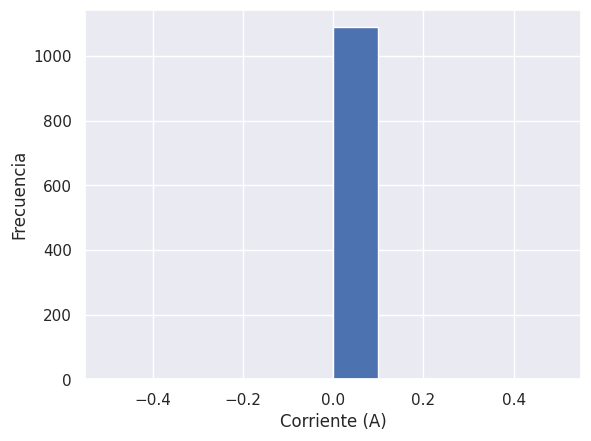

In [ ]:
plt.hist(df["I"])

plt.xlabel("Corriente (A)")
plt.ylabel("Frecuencia")
plt.show()

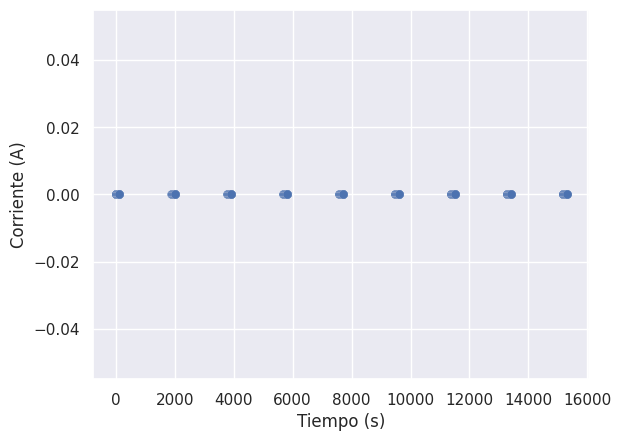

In [ ]:
sns.scatterplot(x=df.index, y=df["I"], linewidth=0.05)
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (A)")
plt.show()

###Tensión

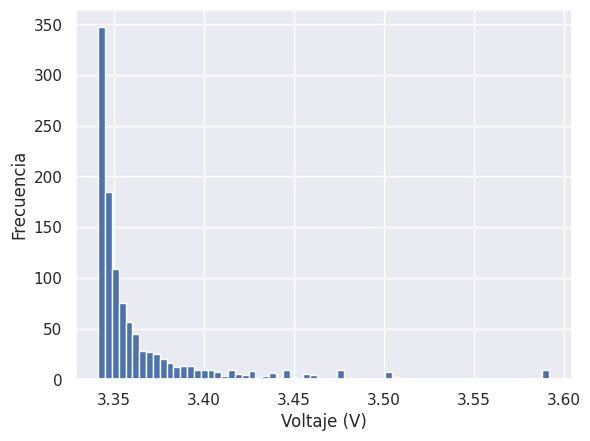

In [ ]:
plt.hist(df["V"], bins="auto")
plt.xlabel("Voltaje (V)")
plt.ylabel("Frecuencia")
plt.show()

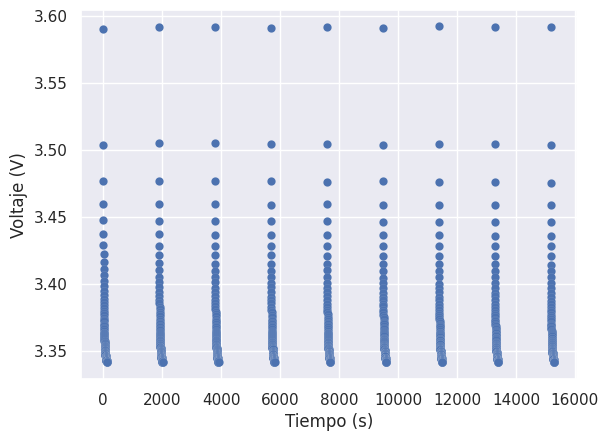

In [ ]:
sns.scatterplot(x=df.index, y=df["V"], linewidth=0.05)
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.show()

###Temperatura

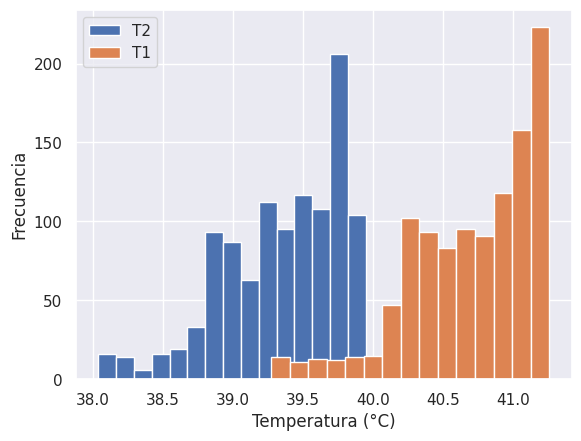

In [ ]:
plt.hist(df["T2"], bins="auto")
plt.hist(df["T1"], bins="auto")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.legend(["T2", "T1"])
plt.show()

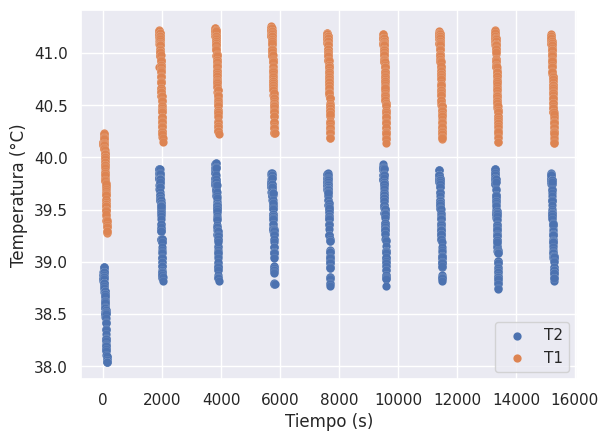

In [ ]:
sns.scatterplot(x=df.index, y=df["T2"], linewidth=0.05, label="T2")
sns.scatterplot(x=df.index, y=df["T1"], linewidth=0.05, label="T1")
plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()

###Estado

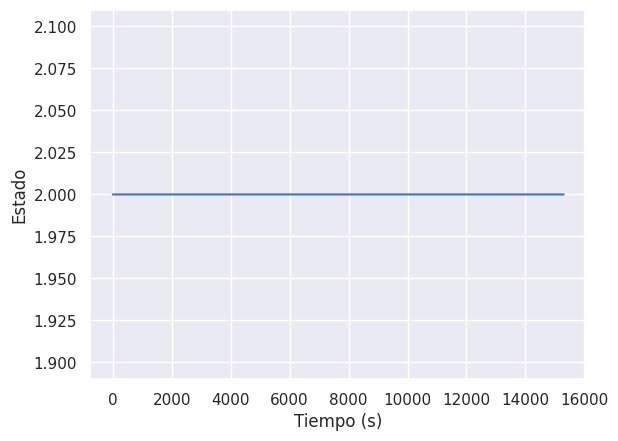

In [ ]:
plt.plot(df["State"])
plt.xlabel("Tiempo (s)")
plt.ylabel("Estado")
plt.show()

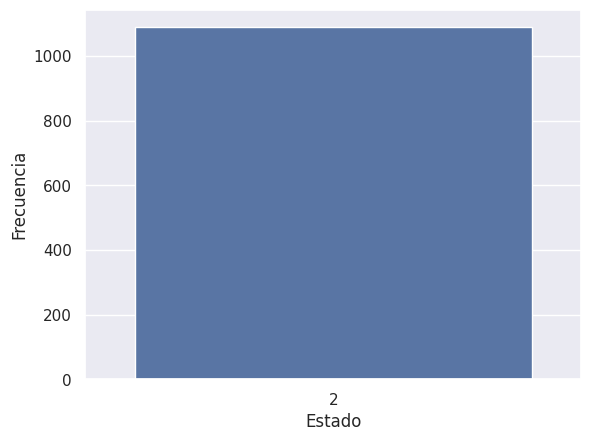

In [ ]:
ax = sns.countplot(x=df['State'])
ax.set(xlabel="Estado", ylabel="Frecuencia")
plt.show()

###Estado de carga

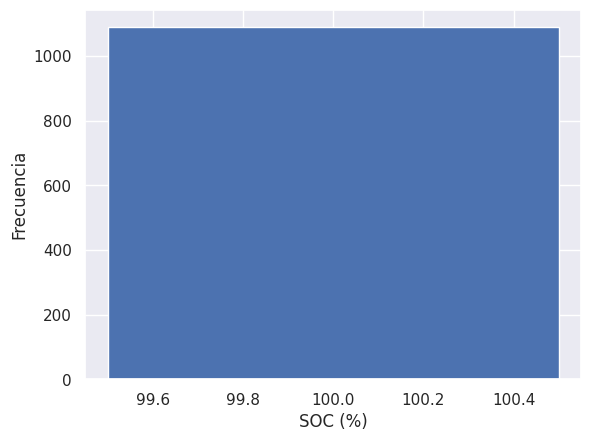

In [ ]:
plt.hist(df["SOC"], bins="auto")
plt.xlabel("SOC (%)")
plt.ylabel("Frecuencia")
plt.show()

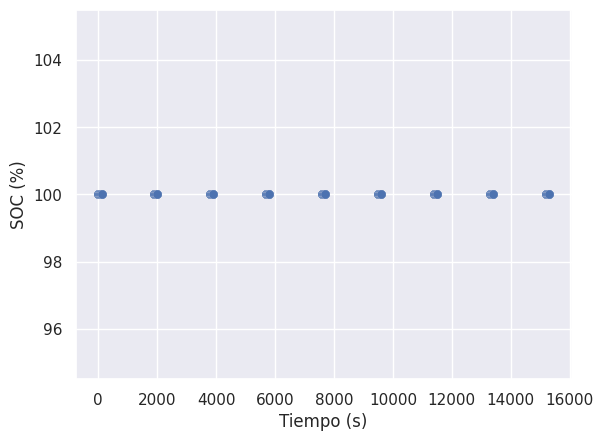

In [ ]:
sns.scatterplot(x=df.index, y=df["SOC"], linewidth=0.05)
plt.xlabel("Tiempo (s)")
plt.ylabel("SOC (%)")
plt.show()

##Matriz de correlación
Después de analizar pormenorizadamente cada variable por separado, procedemos a analizar la correlación entre variables.
Las filas o columnas que no aparecen en la matriz se debe a que su valor es constante.

<Axes: >

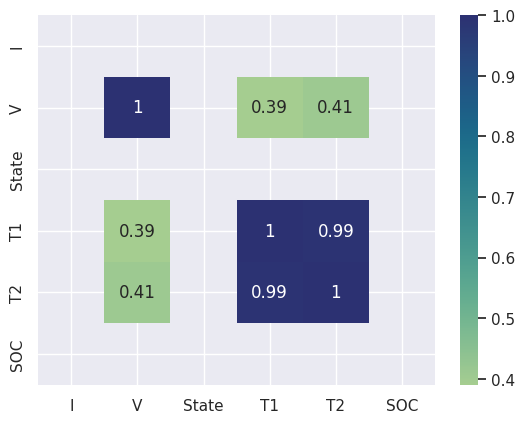

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="crest")

##Análisis bivariado
Analizaremos en gráficas las correlaciones encontradas en la matriz anterior.

###Estado de carga frente a tensión

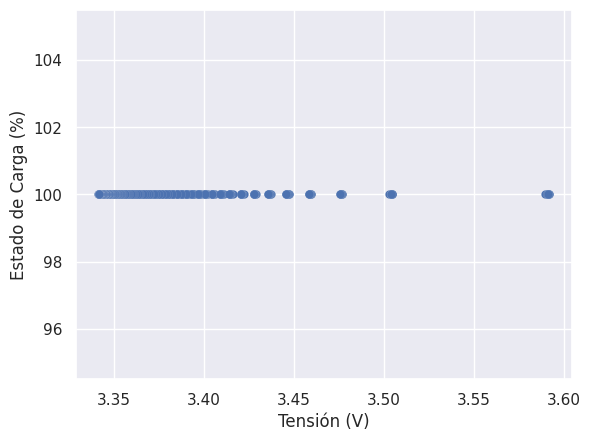

In [ ]:
sns.scatterplot(x=df["V"], y=df["SOC"], linewidth=0.05)
plt.xlabel("Tensión (V)")
plt.ylabel("Estado de Carga (%)")
plt.show()

###Tensión frente a temperatura

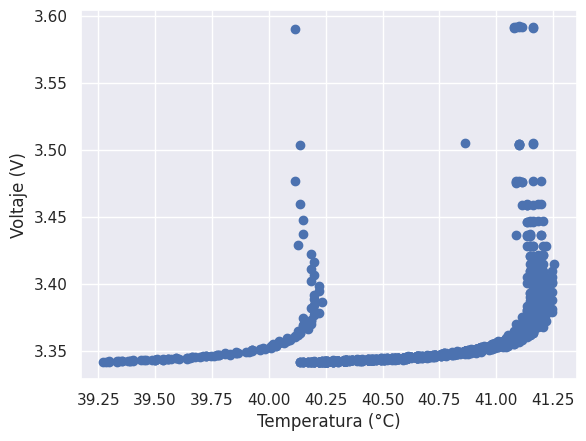

In [ ]:
plt.scatter(df["T1"], df["V"])
plt.xlabel("Temperatura (°C)")
plt.ylabel("Voltaje (V)")
plt.show()

###Temperatura 2 frente a temperatura 1

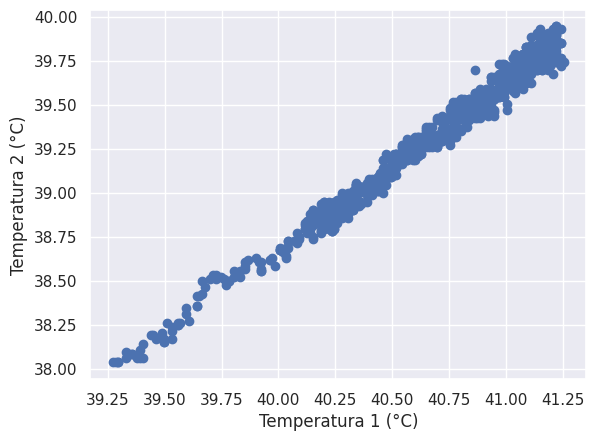

In [ ]:
plt.scatter(df["T1"], df["T2"])
plt.xlabel("Temperatura 1 (°C)")
plt.ylabel("Temperatura 2 (°C)")
#plt.title("Temperatura 2 en función de la temperatura 1")
plt.show()